In [101]:
#importiing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold, cross_val_score

from statsmodels.stats.weightstats import ztest as ztest
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [4]:
#loading the data
df = pd.read_csv("/Users/rituparna/Downloads/Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#to see if all the flaggedfraud transactions are categorized as fraud transactions. 
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


We can see that the data is heavily skewed. 

In [10]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

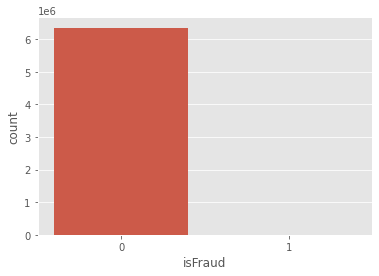

In [102]:
sns.countplot(df['isFraud'])

Hence the data is imbalanced

In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0')])

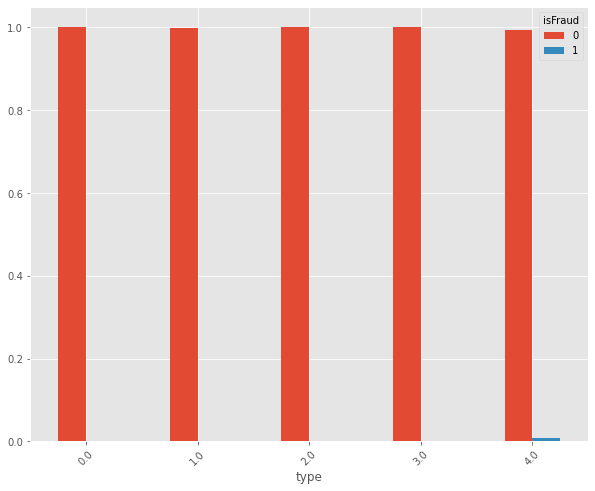

In [103]:
matrix = pd.crosstab(df['type'], df.isFraud)
matrix.div(matrix.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,8))
plt.xticks(rotation=45)

##### The dataset is heavily imbalanced. 

#### Missing Values

In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values in the dataset

#### Outliers

we will use IQR method to calculate the outliers

In [15]:
#function to find the outliers
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    outliers = data[((data < (q1-1.5*IQR))|(data >( q3+1.5*IQR)))]
    return outliers

In [16]:
columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in columns:
    outliers = find_outliers(df[col])
    #percent = len(outliers)/len(df) * 100
    print('number of outliers in '+ col + ' : '+ str(len(outliers)) )

number of outliers in amount : 338078
number of outliers in oldbalanceOrg : 1112507
number of outliers in newbalanceOrig : 1053391
number of outliers in oldbalanceDest : 786135
number of outliers in newbalanceDest : 738527


In [17]:
# cap the outliers

'''To cap the outliers, calculate a upper limit and lower limit. For the upper limit, we will use 
the mean plus three standard deviations. For the lower limit, we will calculate it as 
the mean minus 3 standard deviations.'''

def cap_outliers(data):
    upper_limit = data.mean() + 3*data.std()
    lower_limit = data.mean() - 3*data.std()
    
    data = np.where(data > upper_limit, upper_limit,
                   np.where(data < lower_limit, lower_limit, data))
    return data

In [18]:
columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in columns:
    df[col] = cap_outliers(df[col])

In [19]:
df['amount'].describe()

count    6.362620e+06
mean     1.599807e+05
std      2.637230e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      1.991437e+06
Name: amount, dtype: float64

#### Multicolinearity

In [20]:
X_variables = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest' ]]

vif_data = pd.DataFrame()
vif_data['feature'] = X_variables.columns
vif_data['VIF'] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]


In [21]:
vif_data

,feature,VIF
0,step,1.393170
1,amount,2.643087
2,oldbalanceOrg,292.280306
3,newbalanceOrig,296.423468
4,oldbalanceDest,62.125777
5,newbalanceDest,68.608649


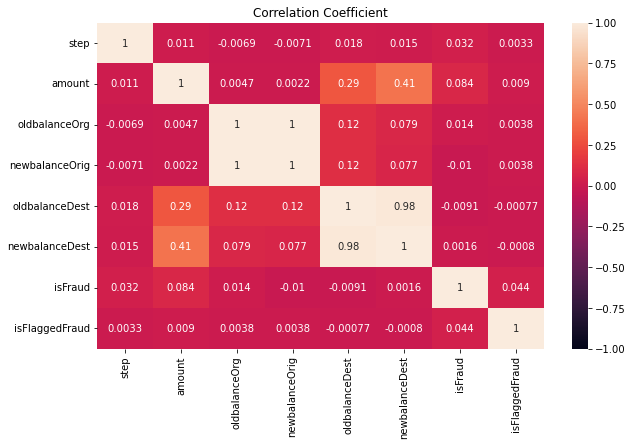

In [22]:
fig , ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient')
plt.show()

Oldbalanceorg, newbalanceorig, oldbalanceDest, newbalanceDest all of them have high VIF and high correlation coefficient. <br>
We calculate the VIF again by removing one feature at a time. <br>

In [23]:
#remove newbalanceOrig
X_variables = df[['step', 'amount', 'oldbalanceOrg',
        'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud' ]]

vif_data = pd.DataFrame()
vif_data['feature'] = X_variables.columns
vif_data['VIF'] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

vif_data

,feature,VIF
0,step,1.393344
1,amount,2.544812
2,oldbalanceOrg,1.180314
3,oldbalanceDest,54.517355
4,newbalanceDest,60.432868
5,isFraud,1.012080
6,isFlaggedFraud,1.002046


In [24]:
#remove oldbalanceDest
X_variables = df[['step', 'amount', 'oldbalanceOrg',
         'newbalanceDest', 'isFraud',
       'isFlaggedFraud' ]]

vif_data = pd.DataFrame()
vif_data['feature'] = X_variables.columns
vif_data['VIF'] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

vif_data

,feature,VIF
0,step,1.366562
1,amount,1.582889
2,oldbalanceOrg,1.097384
3,newbalanceDest,1.500010
4,isFraud,1.012040
5,isFlaggedFraud,1.001997


Now the VIF factor for all the features are within acceptable range. 

In [25]:
#LABEL ENCODING
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

#selecting categorical columns to encode from dataset

cat_columns = list(df.select_dtypes("object").columns)

#setting up the imputer 

transformer = ColumnTransformer(transformers = [("L", OrdinalEncoder(),cat_columns)], remainder = 'passthrough')
cat_columns_imputed = transformer.fit_transform(df[cat_columns])

#passing the imputer values in each of the categorical columns in the original dataset

df[cat_columns] = cat_columns_imputed

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,757869.0,170136.0,160296.36,1662094.0,0.0,0.0,0,0
1,1,3.0,1864.28,2188998.0,21249.0,19384.72,1733924.0,0.0,0.0,0,0
2,1,4.0,181.00,1002156.0,181.0,0.00,439685.0,0.0,0.0,1,0
3,1,1.0,181.00,5828262.0,181.0,0.00,391696.0,21182.0,0.0,1,0
4,1,3.0,11668.14,3445981.0,41554.0,29885.86,828919.0,0.0,0.0,0,0


Feature 0: 2936.630692
Feature 1: 1449133.330662
Feature 2: 2314491993.316221


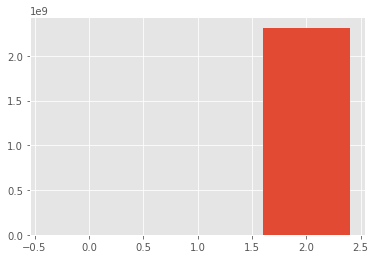

In [104]:
X_cat = df[['type', 'nameOrig', 'nameDest']]
y_cat = df['isFraud']
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_cat, y_cat)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Though it can be seen that feature 2 is most important than the others we will use all of the categorical features . <br>
We will only drop the columns oldbalanceOrg , oldbalanceDest for feature selection. 

#### Feature Selection

In [81]:
df_fs = df.drop(['newbalanceOrig', 'oldbalanceDest'], axis = 1)
df_fs.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,757869.0,170136.0,1662094.0,0.0,0,0
1,1,3.0,1864.28,2188998.0,21249.0,1733924.0,0.0,0,0
2,1,4.0,181.00,1002156.0,181.0,439685.0,0.0,1,0
3,1,1.0,181.00,5828262.0,181.0,391696.0,0.0,1,0
4,1,3.0,11668.14,3445981.0,41554.0,828919.0,0.0,0,0


I will train our model both on feature selected dataset and the whole dataset to see which one gives better result. 
As the data is heavily imbalanced I will use SMOTE technique and imblearn pipeline for training the model

## The whole dataset

In [29]:
X = df.drop(['isFraud'], axis = 1)
y = df.isFraud

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 )

### Fitting Decision Tree with randomized search cv for hyperparamter tuning

In [40]:
kf = KFold(n_splits=5, shuffle=False)

In [46]:
params = {"decisiontreeclassifier__max_depth": range(2,50,5),
              "decisiontreeclassifier__min_samples_split": [10, 20, 50],
              "decisiontreeclassifier__min_samples_leaf": [2, 4, 8],
              "decisiontreeclassifier__criterion": ["gini", "entropy"]}

In [50]:
DT_pipeline = make_pipeline(SMOTE(random_state=42), 
                              DecisionTreeClassifier(random_state=13))
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)
clf = RandomizedSearchCV(DT_pipeline, param_distributions=params, cv = kf,
                         scoring='recall', return_train_score = True, verbose = 10)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=8, decisiontreeclassifier__min_samples_split=50
[CV 1/5; 1/10] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=8, decisiontreeclassifier__min_samples_split=50;, score=(train=0.910, test=0.909) total time=  24.2s
[CV 2/5; 1/10] START decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=8, decisiontreeclassifier__min_samples_split=50
[CV 2/5; 1/10] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=8, decisiontreeclassifier__min_samples_split=50;, score=(train=0.912, test=0.904) total time=  23.6s
[CV 3/5; 1/10] START decisiontreeclassifier__criterion=entropy, decisiontreec

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(random_state=13))]),
                   param_distributions={'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'decisiontreeclassifier__max_depth': range(2, 50, 5),
                                        'decisiontreeclassifier__min_samples_leaf': [2,
                                                                                     4,
                                                                                     8],
                                        'decisiontreeclassifier__min_samples_split': [10,
                                                                                      20,
                                                                                      50]},
                   return_train_score=True, scoring='recall', verbose=10)

In [51]:
clf.best_params_

{'decisiontreeclassifier__min_samples_split': 10,
 'decisiontreeclassifier__min_samples_leaf': 4,
 'decisiontreeclassifier__max_depth': 17,
 'decisiontreeclassifier__criterion': 'entropy'}

In [31]:
DT_model = make_pipeline(SMOTE(random_state=42), 
                              DecisionTreeClassifier(min_samples_split= 10,
                                                     min_samples_leaf= 4,
                                                     max_depth= 17,
                                                     criterion= 'entropy',
                                                     random_state=13))

In [32]:
DT_model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=17,
                                        min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=13))])

In [33]:
y_pred=DT_model.predict(X_test)

#### DT model Evaluation

In [34]:
confusion_matrix(y_test, y_pred)

array([[1903262,    3030],
       [     38,    2456]])

<AxesSubplot:>

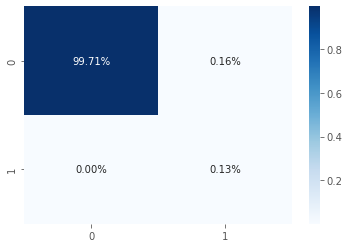

In [105]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906292
           1       0.45      0.98      0.62      2494

    accuracy                           1.00   1908786
   macro avg       0.72      0.99      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786



In [94]:
print(accuracy_score (y_test, y_pred))

0.9983926956714896


### Fitting Random Forest

In [48]:
RF_model = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13, verbose = 100))

In [49]:
RF_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.2s remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.1s remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.5min remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.8min remaining: 

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13, verbose=100))])

In [50]:
y_pred_rf=RF_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

#### RF model Evaluation

In [51]:
confusion_matrix(y_test, y_pred_rf)

array([[1904914,    1378],
       [     99,    2395]])

<AxesSubplot:>

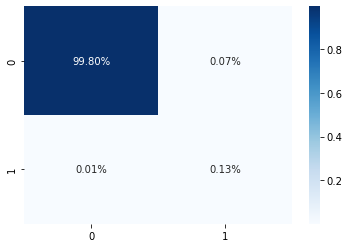

In [98]:
cf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [52]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906292
           1       0.63      0.96      0.76      2494

    accuracy                           1.00   1908786
   macro avg       0.82      0.98      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



In [78]:
print(accuracy_score(y_test, y_pred_rf))

0.9992262097479759


In [58]:
RF_model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(random_state=13, verbose=100))

##### Calculate feature importance from the model

In [59]:
feature_importances = RF_model.steps[1][1].feature_importances_

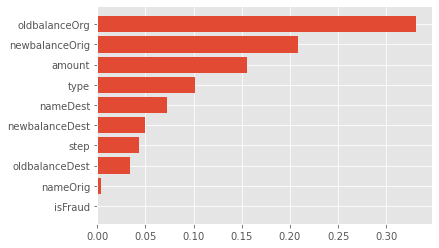

In [100]:

features = df.columns
feature_graph = list(zip(features,feature_importances))
feature_graph.sort(key = lambda x : x[1])
plt.barh([x[0] for x in feature_graph],[x[1] for x in feature_graph])

plt.show()

We can see the features sorted according to most important to the least important one. 

### Feature Selected dataset

In [82]:
X_fs = df_fs.drop(['isFraud'], axis = 1)
y_fs = df_fs.isFraud

In [83]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size = 0.3 )

### Fitting Random Forest

In [85]:
RF_model_fs = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13, verbose = 100))

In [86]:
RF_model_fs.fit(X_train_fs, y_train_fs)

y_pred_fs=RF_model_fs.predict(X_test_fs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.4s remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.6s remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.7min remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.0min remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.3min remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min remaining: 

#### model evaluation

In [87]:
confusion_matrix(y_test_fs, y_pred_fs)

array([[1904305,    2048],
       [    260,    2173]])

<AxesSubplot:>

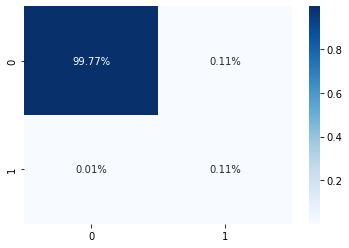

In [97]:
cf = confusion_matrix(y_test_fs, y_pred_fs)
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [88]:
print(classification_report(y_test_fs, y_pred_fs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906353
           1       0.51      0.89      0.65      2433

    accuracy                           1.00   1908786
   macro avg       0.76      0.95      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786



In [89]:
print(accuracy_score(y_test_fs, y_pred_fs))

0.998790854501238


##### Calculating feature importance from the model

In [90]:
feature_importances_fs = RF_model_fs.steps[1][1].feature_importances_

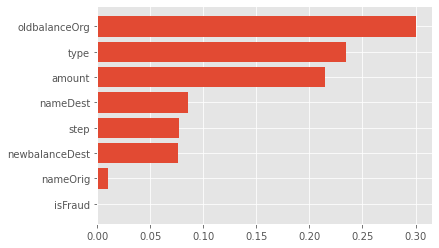

In [106]:
features_fs = df_fs.columns
feature_graph = list(zip(features_fs,feature_importances_fs))
feature_graph.sort(key = lambda x : x[1])
plt.barh([x[0] for x in feature_graph],[x[1] for x in feature_graph])

plt.show()

#### Perform Z test

In [93]:
df_fraud = df[df.isFraud == 1]
df_not_fraud = df[df.isFraud == 0]

columns = ['oldbalanceOrg', 'newbalanceOrig', 'amount', 'step', 'oldbalanceDest', 'newbalanceDest']


for col in columns:
    log_fraud = np.log1p(df_fraud[col])
    log_not_fraud = np.log1p(df_not_fraud[col])
    
    score = ztest(log_fraud, log_not_fraud, value = 0)
    print('z test score for '+ col + ':', score)

z test score for oldbalanceOrg: (87.47587181348572, 0.0)
z test score for newbalanceOrig: (-72.70689116423229, 0.0)
z test score for amount: (94.76301883333737, 0.0)
z test score for step: (38.22961068381686, 0.0)
z test score for oldbalanceDest: (-43.610783597157734, 0.0)
z test score for newbalanceDest: (-19.312849521974343, 4.188149779394302e-83)


### What are the key factors that predict fraudulent customer? Do these factors make sense? If yes, How? If not, How not?

There are variuos features which can be selected as the key factors for predicting Fraudulent customers.  
    
##### In the given dataset we calculated VIF and correlation coefficient to find the relevant features :

- Amount, Oldbalanceorg, newbalanceDest, step all of them were important key features for predicting fradulent transactions. 

##### From Random Forest we performed feature importance to select the features 

we calculated Z test statistics for every key features. For each one of them P value < 0.5. Hence we can reject the null hypothesis and conclude the mean of the fraud and non fraud samples are significantly different for these features. Hence they are important in predicting the pattern. 

These factors do make sense in the following cases: 

    - Transfer amount being more than 200,000 is already flagged as fraud. 

    - The account balance before and after the transaction is an important key factor. For example, an account transfer is happening. But the transfered balance did not get reflected in the recipient bank account is a Fraudulent Transaction. 

    - Though Time steps are important feature according to the dataset but Time steps are not necessarily an estimator of fraud detection unless we can map out a specific time window in which there are more fraudulent transactions in general. 
    

##### Note
I had tried to use SHAP values for feature importance selection but it took too long to run on the dataset. 

### What kind of prevention should be adopted while company update its infrastructure?

Fraud prevention and detection is a continuous, ongoing process and the key to prevention is to detect it right at the stage of origination on a real time basis. <br>
Integrating new technologies is the first and foremost task for every Finance companies to prevent Fraud. 

- Analysis of documents and credit histories of the applicants should be an important step. This is mostly a process where both technology and human supervision is needed. <br>
- An additional layer of preventive actions that financial institutions can incorporate is the analysis of financial patterns of the entity or individual. <br>
- Financial companies can use AI and ML technologies to to analyze patterns and learn from historical cases. 
    - Digital Verification of Documents and user authentication using AI technologies is an essential step towards fraud prevention. As the name of the customer is an important feature for fraud detection. 
    - The category of fraud perpetrators could be different for different types of frauds. ML algorithms can easily classify and categorize the types of fraud from historical data.
    - Fraud related triggers can be also be identified. 


##### In this problem the key features for fraud detection has been identified with significant confidene level. We need to implement infrastructure so that there are less cases of fraud generating from these features. 

### Assuming these actions have been implemented, how would you determine if they work

it is critical to know how humans along with machine learning intelligence can better prevent frauds.

- Human supervised verification and authentication process is self explanatory. 

- Machine Learning algorithms are heavily depended on Data. The data shall be relevant, qualitative, adequate and unbiased. More relevant data we have more accurate the model predictions will be. 
    
- A structured validation mechanism can be implemented to prove or disprove the prediction using evidences. 

- Monitoring is a critical step to determine if the models are working in real time. We can run mock transactions and review false positives and false negatives to identify the extent to which the model needs to be tuned. 